In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import spatial
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [4]:
df_data = pd.read_csv('./all_annotated.csv')

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [145]:
df_data['Median']= df_data.median(axis=1)

In [146]:
df_val = df_data['Median'] != 0
df_not0 = df_data.loc[df_val,:]

In [352]:
df_new = df_not0.drop(columns = 'Median')

In [501]:
df_tg = df_new.iloc[:, 0:2]

In [502]:
df_new2 = df_new.iloc[:, 2:] + 0.1

In [503]:
df_log = np.log2(df_new2)

In [504]:
df_log.insert(0, 'gene_name', df_tg.iloc[:,1])
df_log.insert(0, 't_name', df_tg.iloc[:,0])

In [505]:
df_trans = df_log

In [301]:
df_log.reset_index(inplace=True)

In [307]:
df_log

,index,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
1,8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
2,9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
3,10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
4,11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
8609,34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
8610,34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
8611,34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [152]:
z= linkage(df_log.iloc[:, 1:])
z

array([[1.32300000e+03, 1.32400000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.16300000e+03, 2.16400000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.36800000e+03, 4.36900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.93200000e+03, 1.72210000e+04, 1.30964034e+01, 8.61100000e+03],
       [4.80000000e+02, 1.72220000e+04, 1.32621231e+01, 8.61200000e+03],
       [2.71000000e+03, 1.72230000e+04, 1.46562268e+01, 8.61300000e+03]])

In [153]:
df_transpose = df_log.T

In [154]:
df_transpose

,0,1,2,3,4,5,6,7,8,9,...,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612
index,3.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,16.000000,32.000000,37.000000,...,34646.000000,34647.000000,34649.000000,34656.000000,34658.000000,34663.000000,34665.000000,34667.000000,34684.000000,34715.000000
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950


In [155]:
z2 = linkage(df_transpose.iloc[1:, :])

In [156]:
o = leaves_list(z)
o

array([2710,  480, 3932, ..., 5684, 2530, 4296], dtype=int32)

In [157]:
o2 = leaves_list(z2)
o2

array([ 6, 14,  7, 15,  5, 13,  1,  4, 12, 11,  9,  3,  8,  0,  2, 10],
      dtype=int32)

In [286]:
df_log.reindex(o)

,index,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
2710,10838,10.362427,9.674967,10.730739,10.533361,10.186101,9.915343,11.627885,6.513012,-3.321928,9.911055,9.153596,11.041927,9.669459,10.594618,-3.321928,9.770807
480,1771,5.834810,4.495864,5.910958,6.306998,-3.321928,-3.321928,-3.321928,6.690422,-3.321928,5.681848,5.848470,-3.321928,6.838377,6.329519,-3.321928,-3.321928
3932,15545,6.116518,-3.321928,6.332019,-3.321928,7.029427,7.333518,-3.321928,-3.321928,6.008203,6.486714,6.112357,-3.321928,6.888902,-3.321928,-3.321928,-3.321928
481,1772,10.616585,9.584416,10.723743,10.903922,11.426619,11.456581,11.891232,11.521811,10.592872,9.876014,10.790580,11.210067,11.347327,10.977238,-3.321928,11.715662
3746,14830,5.608112,-3.321928,-3.321928,6.886073,-3.321928,4.775450,-3.321928,7.226825,4.165947,5.750684,3.429699,6.536656,4.906105,-3.321928,4.011398,6.482741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,17883,3.697081,4.215109,3.753138,2.796918,3.022511,0.565386,-3.321928,-3.321928,3.743997,4.404787,4.144922,2.975323,2.514033,2.556431,1.510554,-3.321928
6033,23804,3.928964,4.456723,2.938631,2.515062,3.133134,2.203526,-3.321928,-3.321928,4.032783,3.644903,4.015114,3.918539,3.082398,3.742785,1.904281,-3.321928
5684,22645,3.654464,3.595382,5.371957,4.142772,4.846243,4.190093,-3.321928,-3.321928,2.719274,4.244179,4.159932,3.524966,5.205921,5.551469,1.252376,-3.321928
2530,10127,3.354926,3.734655,3.554976,4.292943,3.798314,4.012782,-3.321928,-3.321928,4.214183,4.118265,3.861936,4.782553,4.623693,4.259026,2.108582,-3.321928


In [287]:
df_trans2 = df_log.T
df_trans2

,0,1,2,3,4,5,6,7,8,9,...,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612
index,3.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,16.000000,32.000000,37.000000,...,34646.000000,34647.000000,34649.000000,34656.000000,34658.000000,34663.000000,34665.000000,34667.000000,34684.000000,34715.000000
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950


In [288]:
df_trans2 = df_trans2.iloc[1:]
df_trans2
df_trans2.reset_index(inplace=True)

In [289]:
df_trans_3 = df_trans2.reindex(o2)

In [290]:
df_trans_3

,index,0,1,2,3,4,5,6,7,8,...,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612
6,male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
14,female_14C,3.851021,-3.321928,2.897078,5.621212,5.736589,4.055034,-3.321928,3.857757,7.034024,...,1.736171,8.230804,2.040126,2.910599,5.029599,6.239269,6.523595,9.435277,-3.321928,0.323943
7,male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
15,female_14D,4.112914,4.665883,4.516802,6.280001,6.410012,5.210168,-3.321928,5.062683,7.175523,...,10.636689,10.727697,6.731971,5.617451,7.769718,7.386673,9.412730,12.153787,-2.713053,1.060677
5,male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
13,female_14B,4.522507,2.066050,2.913181,4.998373,5.113628,3.463944,-3.321928,-3.321928,4.547454,...,6.136627,6.744225,3.190147,2.170009,4.528337,5.452891,4.441070,8.818194,-3.321928,-0.095642
1,male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
4,male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
12,female_14A,4.995485,4.353582,4.784754,6.338167,6.453632,5.070394,5.784683,2.324036,4.410834,...,8.863958,9.872933,6.867815,6.401196,8.073001,7.891809,8.760742,6.942632,-1.913863,2.808283
11,female_13,3.669331,3.869772,4.729653,6.286330,6.439396,4.894166,4.692168,-3.321928,-3.321928,...,1.299810,9.019887,3.015881,5.543784,6.555514,6.170259,8.615611,11.867576,-1.927886,2.828667


In [291]:
df_ordered= df_trans_3.T
df_ordered
header = df_ordered.iloc[0]
df_int= df_ordered.iloc[1:]
df_int.columns = header
df_int


index,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
0,4.51853,3.85102,3.5586,4.11291,4.74968,4.52251,3.59309,4.24048,4.99549,3.66933,3.80963,3.77261,4.45905,4.57365,4.38319,4.05156
1,4.14581,-3.32193,3.43687,4.66588,-3.32193,2.06605,-3.32193,3.89776,4.35358,3.86977,-3.32193,-3.32193,-3.32193,3.47212,-3.32193,3.9058
2,3.80107,2.89708,3.70106,4.5168,2.9903,2.91318,-3.32193,4.4848,4.78475,4.72965,1.59416,4.80188,4.2227,4.26062,3.90037,4.20967
3,6.23034,5.62121,5.75061,6.28,2.94598,4.99837,2.01271,6.07272,6.33817,6.28633,4.08186,6.13017,5.48696,2.68161,2.66547,5.72869
4,6.34579,5.73659,5.90106,6.41001,6.95361,5.11363,3.55226,6.18816,6.45363,6.4394,4.1968,6.24561,5.60232,6.89997,6.90974,5.84408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,6.16692,6.23927,6.94574,7.38667,4.67518,5.45289,0.20933,6.6813,7.89181,6.17026,-0.371506,8.69687,6.90534,5.06356,3.31221,5.59722
8609,8.49332,6.5236,7.7975,9.41273,5.77831,4.44107,-0.437467,8.35056,8.76074,8.61561,1.17224,9.01452,8.25979,4.6616,4.41827,7.64975
8610,11.2838,9.43528,10.6901,12.1538,9.21394,8.81819,5.09509,11.1365,6.94263,11.8676,6.26032,12.2717,11.3326,11.1919,9.8575,11.0871
8611,-3.32193,-3.32193,-2.1434,-2.71305,-3.32193,-3.32193,-3.32193,-3.32193,-1.91386,-1.92789,-3.32193,-2.30182,0.00326833,-2.5348,-2.34821,-3.32193


In [217]:
import seaborn as sns

Text(0.5, 1.0, 'Differential gene expression')

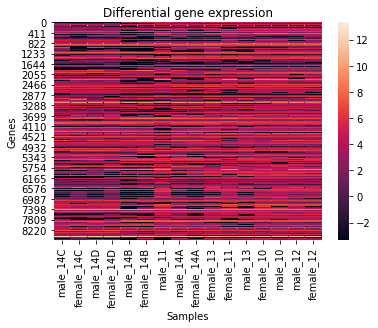

In [280]:
ax = sns.heatmap(df_int.astype(float))
ax.set_xlabel('Samples')
ax.set_ylabel('Genes')
ax.set_title('Differential gene expression')

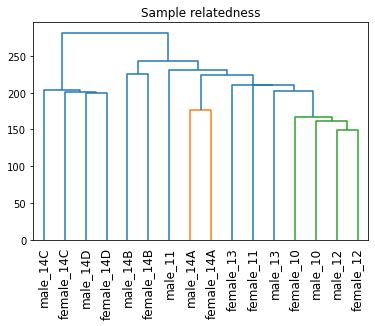

In [278]:
label = ['male_10', 'male_11', 'male_12', 'male_13', 'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10', 'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B', 'female_14C', 'female_14D']
dendrogram(z2, labels = label)
plt.xticks(rotation = 90)
plt.title('Sample relatedness')
plt.show()

In [506]:
df_trans

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [507]:
df_trans.pop('t_name')

3        FBtr0302347
8        FBtr0113885
9        FBtr0301810
10       FBtr0113895
11       FBtr0345179
            ...     
34663    FBtr0100884
34665    FBtr0100886
34667    FBtr0100888
34684    FBtr0114261
34715    FBtr0114216
Name: t_name, Length: 8613, dtype: object

In [548]:
df_trans

,gene_name,male_10,male_11,male_12,male_13,male_14,male_14,male_14,male_14,female_10,female_11,female_12,female_13,female_14,female_14,female_14,female_14
3,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [549]:
df_trans.columns = ['gene_name', 'male_10', 'male_11', 'male_12', 'male_13', 'male_14', 'male_14', 'male_14', 'male_14', 'female_10', 'female_11', 'female_12', 'female_13', 'female_14', 'female_14', 'female_14', 'female_14']
df_trans

,gene_name,male_10,male_11,male_12,male_13,male_14,male_14,male_14,male_14,female_10,female_11,female_12,female_13,female_14,female_14,female_14,female_14
3,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [550]:
df_almost = df_trans.T

In [551]:
header = df_almost.iloc[0]
df_almost = df_almost[1:]
df_almost.columns = header

In [552]:
df_almost

gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12581,CG12582,...,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR41590,CR40679
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,5.82113,6.40385,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,4.05956,5.46229,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,3.60902,10.2568,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383
male_14,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,6.89477,7.99489,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674
male_14,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,6.12108,6.91031,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193
male_14,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,7.81442,8.48709,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194
male_14,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,7.52131,7.18584,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158
female_10,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,4.53384,...,7.63422,9.3767,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295
female_11,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,3.09516,...,1.14094,3.88932,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145


In [553]:
df_almost.reset_index(inplace=True)

In [554]:
df_almost

gene_name,index,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12581,...,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR41590,CR40679
0,male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,...,5.82113,6.40385,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806
1,male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,...,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193
2,male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,...,4.05956,5.46229,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688
3,male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,...,3.60902,10.2568,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383
4,male_14,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,...,6.89477,7.99489,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674
5,male_14,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,...,6.12108,6.91031,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193
6,male_14,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,...,7.81442,8.48709,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194
7,male_14,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,...,7.52131,7.18584,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158
8,female_10,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,...,7.63422,9.3767,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295
9,female_11,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,...,1.14094,3.88932,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145


In [555]:
sex = []
for ind, row in df_almost.iterrows():
    samp = row.iloc[0]
   # print(type(samp))
    if samp[0] == 'm':
        sex.append('male')
    elif samp[0] == 'f':
        sex.append('female')
df_var = pd.DataFrame(sex)

In [556]:
column = ['sex']
df_var.columns = column

In [557]:
df_var

,sex
0,male
1,male
2,male
3,male
4,male
5,male
6,male
7,male
8,female
9,female


In [558]:
stage = []
for ind, row in df_almost.iterrows():
    samp = row.iloc[0]
    if samp[-1] == '0':
        stage.append('10')
    elif samp[-1] == '1':
        stage.append('11')
    elif samp[-1] == '2':
        stage.append('12')
    elif samp[-1] == '3':
        stage.append('13')
    else:
        stage.append('14')
for i in range(0, len(stage)): 
    stage[i] = int(stage[i])
df_var['stage'] = stage

In [559]:
df_var

,sex,stage
0,male,10
1,male,11
2,male,12
3,male,13
4,male,14
5,male,14
6,male,14
7,male,14
8,female,10
9,female,11


In [560]:
df_almost.pop('index')

0       male_10
1       male_11
2       male_12
3       male_13
4       male_14
5       male_14
6       male_14
7       male_14
8     female_10
9     female_11
10    female_12
11    female_13
12    female_14
13    female_14
14    female_14
15    female_14
Name: index, dtype: object

In [561]:
df_almost

gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12581,CG12582,...,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR41590,CR40679
0,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,5.82113,6.40385,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806
1,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193
2,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,4.05956,5.46229,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688
3,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,3.60902,10.2568,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383
4,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,6.89477,7.99489,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674
5,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,6.12108,6.91031,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193
6,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,7.81442,8.48709,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194
7,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,7.52131,7.18584,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158
8,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,4.53384,...,7.63422,9.3767,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295
9,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,3.09516,...,1.14094,3.88932,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145


In [524]:
genes = df_almost.columns.to_list()

In [656]:
no_sex = []
counter = 0
for gene, FPKM in df_almost.iteritems():
    exp = FPKM.to_list()
    exp2 = []
    for i in range(0, len(exp)):
        exp[i] = float(exp[i])
        exp2.append(exp[i])
    #print(exp2)
    df_3 = pd.DataFrame(exp2)
    header = ['FPKM']
    df_3.columns = header
    df_merge = df_3.merge(df_var, left_index=True, right_index=True)
    counter += 1
    #print(counter)
    reg = smf.ols(formula = "stage ~ 1 + FPKM", data = df_merge)
    summ = reg.fit()
    p_val = summ.pvalues
    #print(p_val)
    stats = pd.DataFrame(p_val)
    p_value = stats.iloc[1, 0]
    #print(p_value)
    stat = []
    stat.append(gene)
    stat.append(p_value)
    #print(stat)
    no_sex.append(stat)

In [646]:
print(no_sex)

[['CR40182', 0.8724962829302019], ['Parp', 0.16237784160696642], ['Alg-2', 0.26308004504563465], ['Tim17b', 0.03152074074983908], ['Tim17b', 0.22144463001228043], ['CG41128', 0.026844794625965198], ['CG41099', 0.7939593130971248], ['CG41099', 0.9449779686993138], ['CG12581', 8.450609073393498e-05], ['CG12582', 0.04576636498572528], ['CG12582', 0.05989603740251728], ['aux', 0.502828524816119], ['aux', 0.9795607227302575], ['CG14641', 2.027652811935785e-06], ['abs', 1.1968695253503875e-06], ['Vps24', 0.0003727516678597215], ['CG9795', 0.16985732753180544], ['CG9795', 0.5699473374035596], ['CG9776', 0.015965380011706325], ['Skp2', 0.10860866904290134], ['Skp2', 0.18537077449302883], ['CG1103', 0.19443903619081915], ['CG1103', 0.5841333735689274], ['hkb', 6.308140979502237e-10], ['CG11739', 0.014979276895876083], ['CG11739', 0.01715759038182059], ['CG11739', 0.08119426532872144], ['CG14646', 0.33463198686012574], ['CG14646', 0.3203561460785298], ['CG9855', 0.0002197215585589109], ['CG9855'

In [665]:
ps = []
genes = []
for gene in no_sex:
    p= gene[1]
    g = gene[0]
    ps.append(p)
    genes.append(g)
    #print(ps)
df_p = pd.DataFrame(genes)
df_p.columns = ['Gene']
df_p['P'] = ps
df_p['-logP'] = -np.log10(df_p['P'])
df_p

,Gene,P,-logP
0,CR40182,0.872496,0.059236
1,Parp,0.162378,0.789473
2,Alg-2,0.263080,0.579912
3,Tim17b,0.031521,1.501404
4,Tim17b,0.221445,0.654735
...,...,...,...
8608,mt:Cyt-b,0.049018,1.309643
8609,mt:ND1,0.051185,1.290861
8610,mt:lrRNA,0.546605,0.262326
8611,CR41590,0.170680,0.767819


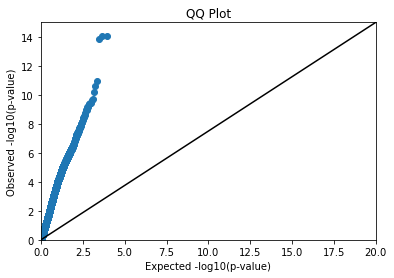

In [666]:
df_sort = df_p.sort_values(by='P')
df_sort['uniform_points'] = range(0, len(df_sort))
df_sort['uniform_pval'] = (df_sort['uniform_points'] + 1) / len(df_sort)
df_sort['uniform_logP'] = -1 * np.log10(df_sort['uniform_pval'])
df_sort['index'] = range(len(df_p))
df_sort
fig, ax = plt.subplots()

ax.scatter(df_sort["uniform_logP"], df_sort["-logP"])
ax.plot([20,0], [15, 0], color = "black")

ax.set_xlim([0, 20])
ax.set_ylim([0, 15])
ax.set_xlabel('Expected -log10(p-value)')
ax.set_ylabel("Observed -log10(p-value)")
ax.set_title('QQ Plot')

plt.show()

In [667]:
df_sort

,Gene,P,-logP,uniform_points,uniform_pval,uniform_logP,index
5153,Ppa,8.260525e-15,14.082992,0,0.000116,3.935154,0
5154,Ppa,8.260525e-15,14.082992,1,0.000232,3.634124,1
5152,Ppa,1.454301e-14,13.837346,2,0.000348,3.458033,2
7951,CG14915,1.047712e-11,10.979758,3,0.000464,3.333094,3
2209,CG8960,2.536184e-11,10.595819,4,0.000581,3.236184,4
...,...,...,...,...,...,...,...
5958,RpS14a,9.985308e-01,0.000639,8608,0.999536,0.000202,8608
5601,CG2924,9.987745e-01,0.000533,8609,0.999652,0.000151,8609
1060,CG7215,9.991114e-01,0.000386,8610,0.999768,0.000101,8610
2518,RhoGEF4,9.995359e-01,0.000202,8611,0.999884,0.000050,8611


In [671]:
df_sort['FDR'] = 0.1 * ((df_sort['index'] + 1)/ len(df_sort))
df_sort

,Gene,P,-logP,uniform_points,uniform_pval,uniform_logP,index,FDR
5153,Ppa,8.260525e-15,14.082992,0,0.000116,3.935154,0,0.000012
5154,Ppa,8.260525e-15,14.082992,1,0.000232,3.634124,1,0.000023
5152,Ppa,1.454301e-14,13.837346,2,0.000348,3.458033,2,0.000035
7951,CG14915,1.047712e-11,10.979758,3,0.000464,3.333094,3,0.000046
2209,CG8960,2.536184e-11,10.595819,4,0.000581,3.236184,4,0.000058
...,...,...,...,...,...,...,...,...
5958,RpS14a,9.985308e-01,0.000639,8608,0.999536,0.000202,8608,0.099954
5601,CG2924,9.987745e-01,0.000533,8609,0.999652,0.000151,8609,0.099965
1060,CG7215,9.991114e-01,0.000386,8610,0.999768,0.000101,8610,0.099977
2518,RhoGEF4,9.995359e-01,0.000202,8611,0.999884,0.000050,8611,0.099988


In [672]:
sig_genes = []
for i, row in df_sort.iterrows():
    if row.loc['FDR'] > row.loc['P']:
        sig_genes.append(row.loc['Gene'])
        

In [698]:
print(sig_genes)

3790


In [690]:
co_sex = []
for gene, FPKM in df_almost.iteritems():
    exp = FPKM.to_list()
    exp2 = []
    for i in range(0, len(exp)):
        exp[i] = float(exp[i])
        exp2.append(exp[i])
    #print(exp2)
    df_3 = pd.DataFrame(exp2)
    header = ['FPKM']
    df_3.columns = header
    df_merge = df_3.merge(df_var, left_index=True, right_index=True)
    counter += 1
    #print(counter)
    reg = smf.ols(formula = "stage ~ 1 + FPKM + C(sex)", data = df_merge)
    summ = reg.fit()
    p_val = summ.pvalues
    #print(p_val)
    stats = pd.DataFrame(p_val)
    p_value = stats.iloc[2, 0]
    #print(p_value)
    stat = []
    stat.append(gene)
    stat.append(p_value)
    #print(stat)
    co_sex.append(stat)

In [692]:
sps = []
sgenes = []
for gene in co_sex:
    p= gene[1]
    g = gene[0]
    sps.append(p)
    sgenes.append(g)
    #print(ps)
df_ps = pd.DataFrame(sgenes)
df_ps.columns = ['Gene']
df_ps['P'] = sps
df_ps['-logP'] = -np.log10(df_p['P'])
sdf_sort = df_ps.sort_values(by='P')
sdf_sort['index'] = range(len(sdf_sort))
sdf_sort['FDR'] = 0.1 * ((sdf_sort['index'] + 1)/ len(sdf_sort))
sdf_sort

,Gene,P,-logP,index,FDR
5154,Ppa,6.477941e-14,14.082992,0,0.000012
5153,Ppa,6.477941e-14,14.082992,1,0.000023
5152,Ppa,1.140239e-13,13.837346,2,0.000035
7951,CG14915,2.904440e-11,10.979758,3,0.000046
2209,CG8960,1.323227e-10,10.595819,4,0.000058
...,...,...,...,...,...
5958,RpS14a,9.984889e-01,0.000639,8608,0.099954
5601,CG2924,9.988044e-01,0.000533,8609,0.099965
1060,CG7215,9.991187e-01,0.000386,8610,0.099977
2518,RhoGEF4,9.995516e-01,0.000202,8611,0.099988


In [694]:
sig_sgenes = []
for i, row in sdf_sort.iterrows():
    if row.loc['FDR'] > row.loc['P']:
        sig_sgenes.append(row.loc['Gene'])

In [697]:
print(sig_sgenes)

['Ppa', 'Ppa', 'Ppa', 'CG14915', 'CG8960', 'term', 'CG7271', 'CG34214', 'CG6770', 'Dtg', 'twi', 'twi', 'Ilp4', 'hkb', 'CG2129', 'Nrt', 'endos', 'sala', 'CR45270', 'CG13427', 'D', 'spri', 'CR45270', 'mira', 'CG13454', 'Bsg25D', 'endos', 'CG43725', 'Tcp-1zeta', 'CR45270', 'link', 'D', 'CG6180', 'CG4164', 'Cys', 'Kr', 'brk', 'CG45099', 'CR44676', 'Kr', 'CG8026', 'Jafrac1', 'CG17249', 'mip40', 'dhd', 'CG1218', 'CG45085', 'CG10932', 'Bx', 'GILT2', 'CG5059', 'CG6293', 'CG10932', 'CG10035', 'Hsp26', 'Hsp26', 'CG8635', 'GstD3', 'CG14317', 'spo', 'spo', 'retn', 'cbt', 'cN-IIIB', 'Aats-tyr', 'CG4440', 'CG9953', 'CG5569', 'png', 'Pmm45A', 'CSN7', 'lost', 'aret', 'CG14937', 'mtrm', 'CG8929', 'CG10035', 'CG6015', 'CR43949', 'GstO2', 'CG15771', 'pont', 'sna', 'CREG', 'btd', 'CG6293', 'CG42662', 'GlcT-1', 'CG15771', 'kin17', 'E(spl)m7-HLH', 'CG34224', 'mRpS29', 'Aldh', 'gt', 'croc', 'CG5537', 'Cpr60D', 'Prx3', 'hyx', 'CG9926', 'Dlc90F', 'Catsup', 'zuc', 'IntS11', 'fzy', 'CG16812', 'Tom', 'CG5059', 'A

In [704]:
overlap = 0
for gene in sig_sgenes:
    if gene in sig_genes:
        overlap += 1
    else:
        continue
length = len(sig_genes)
percentage_overlap = (overlap/length)*100
print(percentage_overlap)

96.49076517150395
